<font color="#e32b3d"><h1>Multi-Layer Perceptron</h2></font>

Using Car Price Dataset

<font color="#2ff9b3d"><h1>part A: Pre-processing </h1></font>

all required library and packages are imported.

In [157]:
# Import library
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from prettytable import PrettyTable

Using the pandas the data frame is read. Obviously the path must be changed to the directory of the *CarPrice_Assignment.csv* file.

In [158]:
# Import dataset
df = pd.read_csv('/Users/yaraghib/Desktop/UT/4th Semester/Neural Network/CA/NNDL_HW1/Q4_Dataset/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Finding the number of NaN values in the dataframe

In [160]:
column_list = df.columns
Num_of_NaN_Table = PrettyTable()
Num_of_NaN_list = []
Num_of_NaN_Table_col = ["Coulmn Title", "Numof NaNs"]
Num_of_NaN_Table.add_column(Num_of_NaN_Table_col[0], column_list)
for i in column_list:
    Num_of_NaN_list.append((df[i].isna().sum()))
    
Num_of_NaN_Table.add_column(Num_of_NaN_Table_col[1], Num_of_NaN_list)

print(Num_of_NaN_Table)

+------------------+------------+
|   Coulmn Title   | Numof NaNs |
+------------------+------------+
|      car_ID      |     0      |
|    symboling     |     0      |
|     CarName      |     0      |
|     fueltype     |     0      |
|    aspiration    |     0      |
|    doornumber    |     0      |
|     carbody      |     0      |
|    drivewheel    |     0      |
|  enginelocation  |     0      |
|    wheelbase     |     0      |
|    carlength     |     0      |
|     carwidth     |     0      |
|    carheight     |     0      |
|    curbweight    |     0      |
|    enginetype    |     0      |
|  cylindernumber  |     0      |
|    enginesize    |     0      |
|    fuelsystem    |     0      |
|    boreratio     |     0      |
|      stroke      |     0      |
| compressionratio |     0      |
|    horsepower    |     0      |
|     peakrpm      |     0      |
|     citympg      |     0      |
|    highwaympg    |     0      |
|      price       |     0      |
+-------------

No "Nan" values were found in the dataframe.

The company name portion of the *Carname* column is separated and stored in a new column : *CompanyName*

Then columns 'car_ID', 'symboling', 'CarName' are omitted.

In [161]:
CompanyName_list = []
for j in range(df.CarName.values.shape[0]):
    CompanyName_list.append(df.CarName.values[j].split()[0])

df = df.drop(['car_ID', 'symboling', 'CarName'], axis = 1)
df.insert(0, "CompanyName", CompanyName_list, True)
df.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In order to correct the mis-spelled company names the wrong ones and right ones are stored in a list. After finding the mis-spelled ones in the dataframe they are replaced with the right ones.

In [162]:
companies = [['Nissan','nissan'], ['maxda','mazda'], ['porcshce','porsche'], ['toyouta', 'toyota'], ['vokswagen', 'volkswagen']]
for pair in (companies):
    while(df.loc[df.CompanyName == pair[0]].empty != True):
        idx = df.loc[df.CompanyName == pair[0]].index.values[0]
        df.at[idx, 'CompanyName'] = pair[1]


Checking the values in the 'CompanyName' column shows that there are no more mis-spelled company names.

In [163]:
set(df['CompanyName'].values)


{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'vw'}

All the string-like values in the dataframe must be encoded into numbers. To do so *get_dummies* is used that encodes all those columns in a "one Hot manner.

Obviusly the number of columns increases and in the encoded dataframe there are 75 columns(features).

In [164]:
df_encoded = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               drop_first =False,
               dtype='int8')
column_list = df_encoded.columns
num_cols = df_encoded.shape[1]
df_encoded

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,OHE_twelve,OHE_two,OHE_1bbl,OHE_2bbl,OHE_4bbl,OHE_idi,OHE_mfi,OHE_mpfi,OHE_spdi,OHE_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


The correlation matrix is plotted:

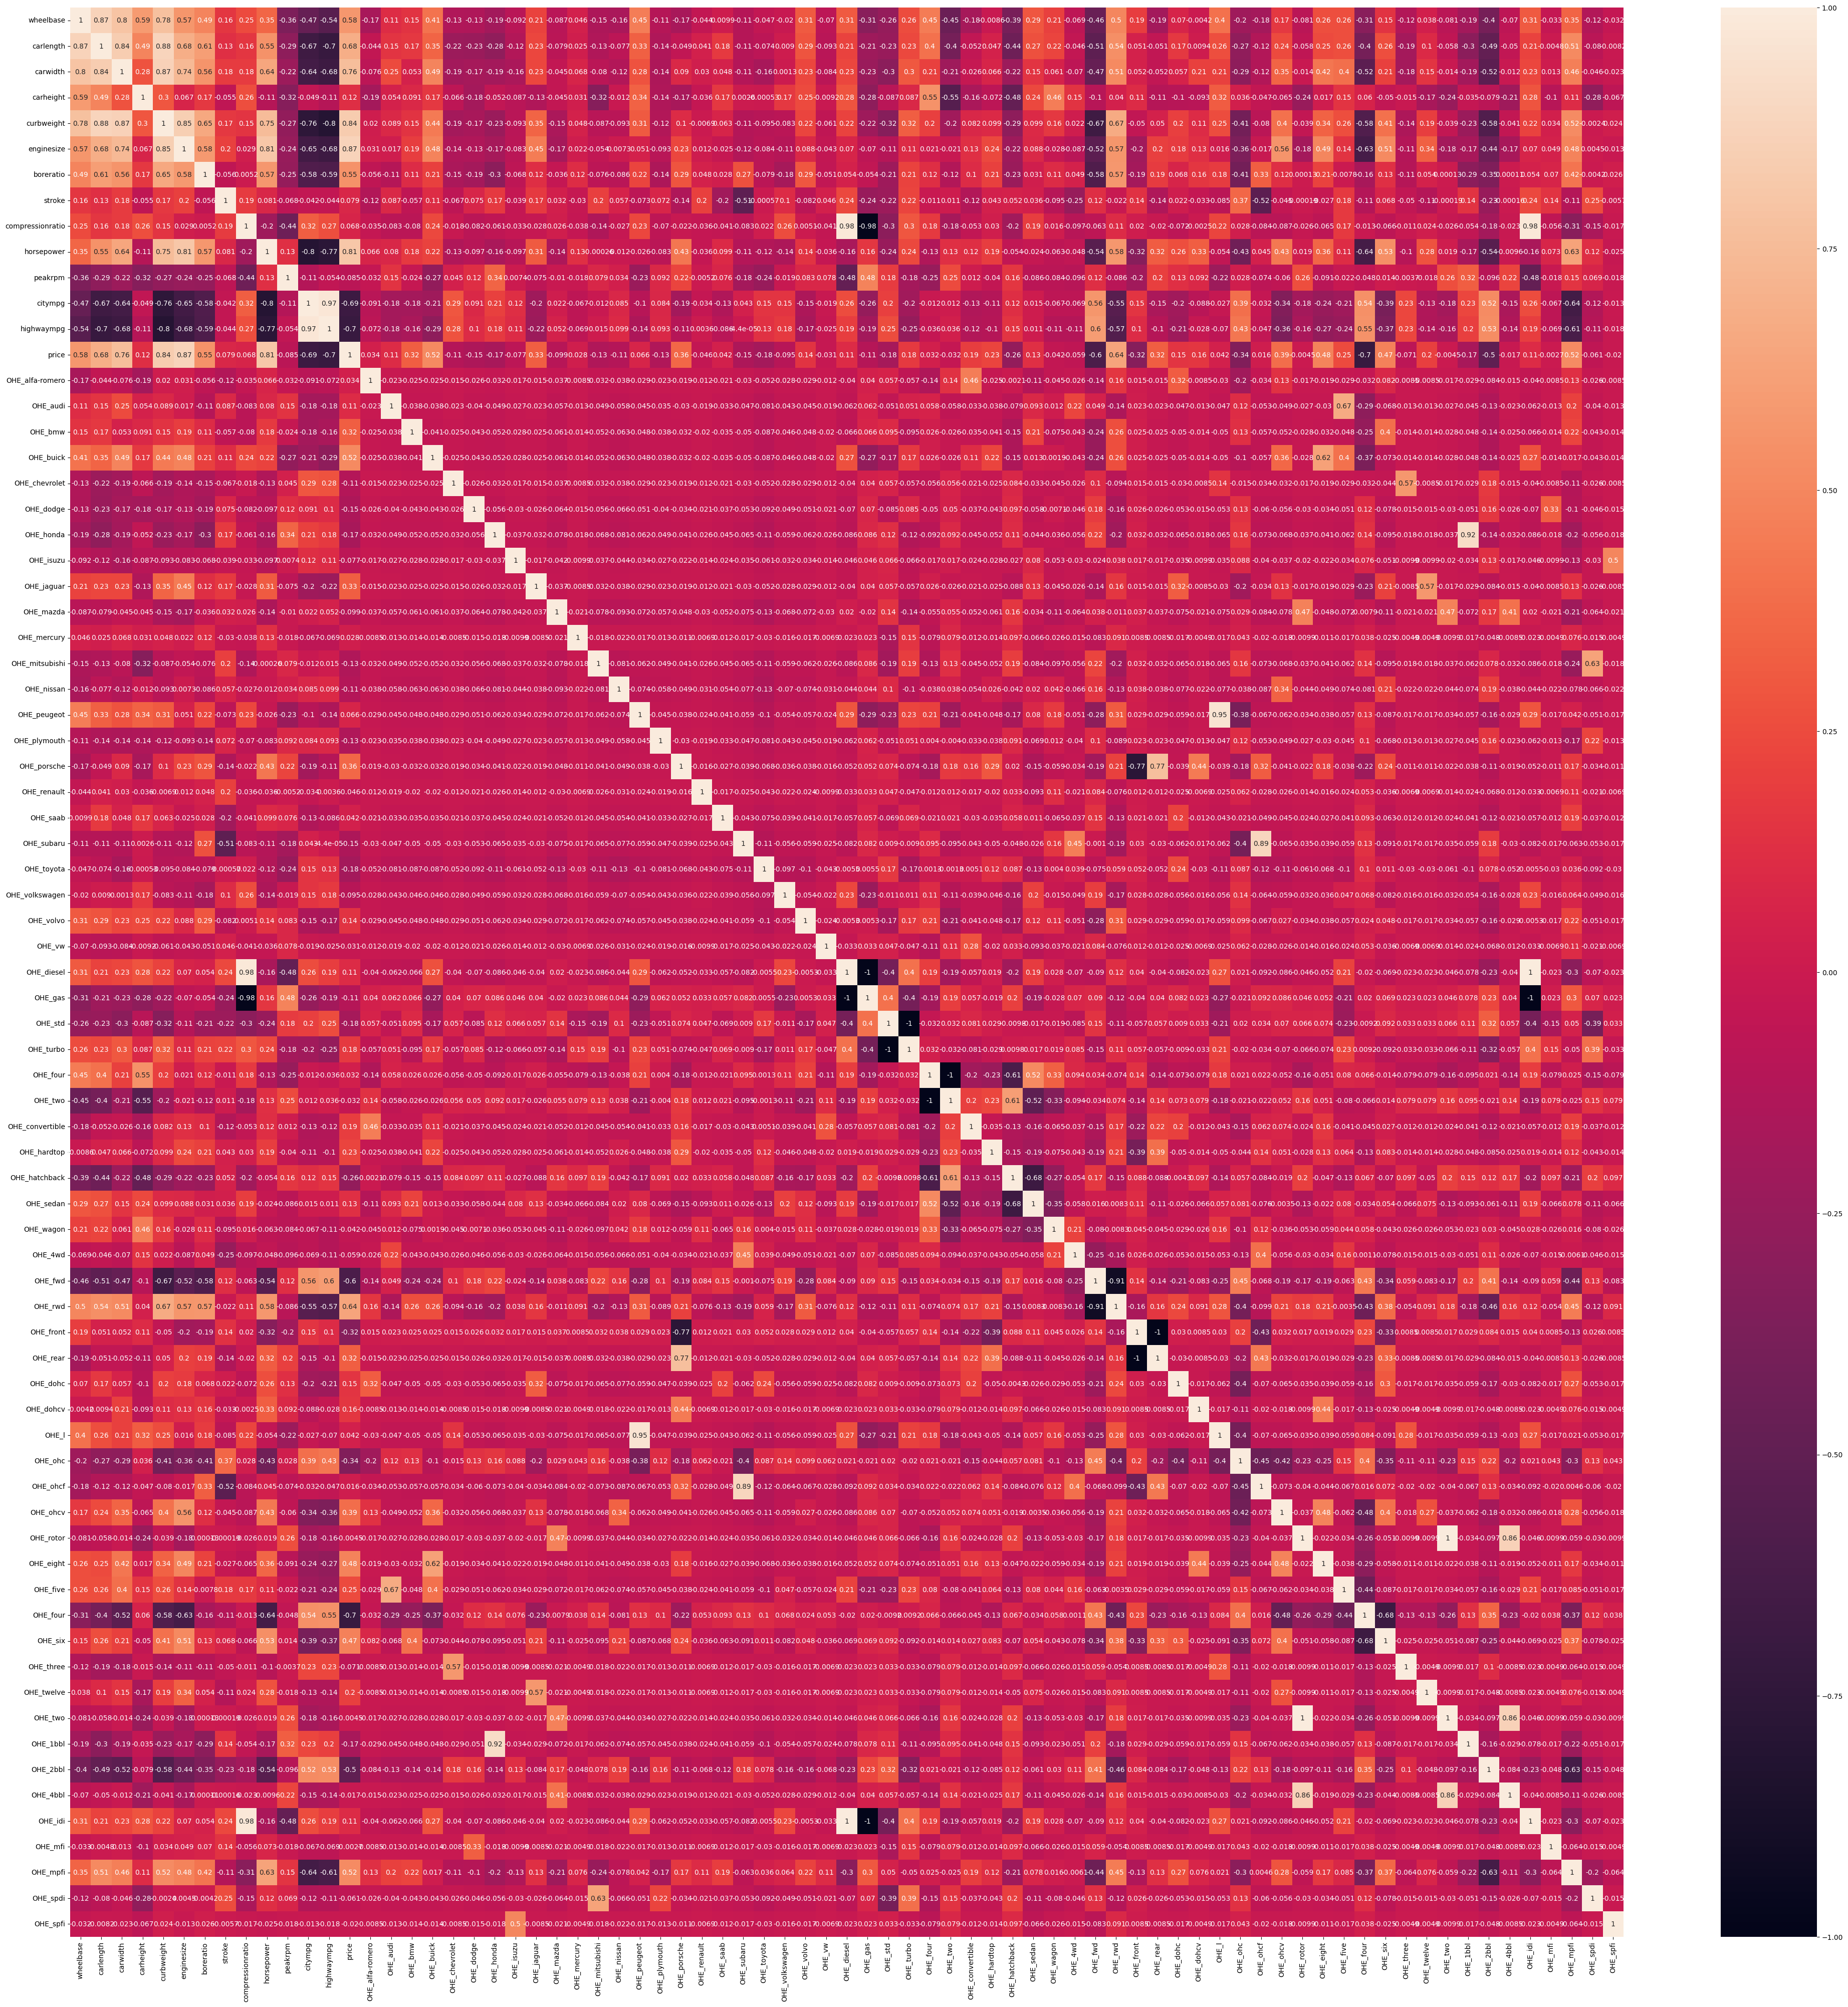

In [165]:
plt.figure(figsize=(50,50))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

The maximum correlation of the any feature is with itself so to find the next feature that has the maximum correlarion with "price", the "price column must be dropped and the the maximum is found.

In [166]:
print("maximum Correlation: "+ str(corr_matrix.drop('price', axis = 0).price.values.max()))
feat_w_highest_corr = column_list[list(corr_matrix.price.values).index(corr_matrix.drop('price', axis = 0).price.values.max())]
print("feature with highest correlation with Price is '"+str(feat_w_highest_corr)+"'")

maximum Correlation: 0.8741448025245117
feature with highest correlation with Price is 'enginesize'


The histogram of Price feature is plotted. it shows the distribution of this feature.

Price feature vs the feature with highest correlation is shown in a scatter plot.

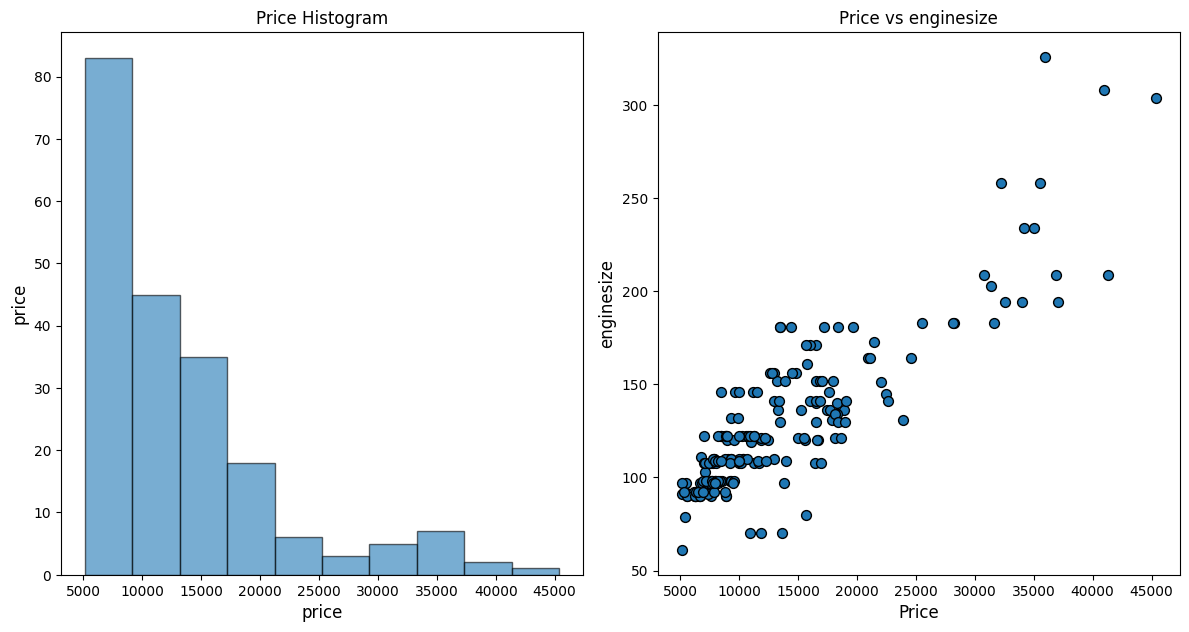

In [167]:
plt.figure(figsize=(12,12))
## Plotting a Histogram for Price
X = df_encoded.price
Y = df_encoded[str(feat_w_highest_corr)]
plt.subplot(2, 2, 1)
plt.title("Price Histogram")
plt.hist(X,edgecolor='black',  alpha = 0.6)
plt.xlabel("price", fontsize = 12)
plt.ylabel("price", rotation = 90, fontsize = 12)
plt.autoscale()

plt.subplot(2, 2, 2)
plt.title("Price vs "+str(feat_w_highest_corr))
plt.scatter(X, Y, s = 200, marker = '.',edgecolor='black')
plt.xlabel("Price", fontsize = 12)
plt.ylabel(str(feat_w_highest_corr), rotation = 90, fontsize = 12)
plt.autoscale()

plt.tight_layout()


In order to better show the distribution of the price feature "distplot" can be used:

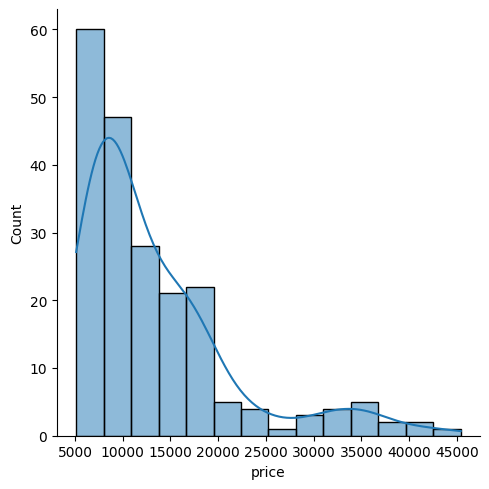

In [168]:
sns.displot(df, x="price", kde=True)

    * Train Test Validation Split

* 85 percent of the dataset samples are selected for the train set.
* 30 precent of that 85 percent is selected for the validation set.
* 15 percent of the dataset samples are selected for the test set.

All of the selections are random

In [169]:
from sklearn.model_selection import train_test_split
## Spitting Train and Test
df_encode_y = df_encoded.price
x_train, x_test, y_train, y_test = train_test_split(df_encoded,df_encode_y,train_size=0.85,random_state=2)
train_set = x_train.copy()
test_set = x_test.copy()
# inserting the target column to make a complete set
train_set.insert(x_train.shape[1], "Price", y_train.values, True)
test_set.insert(x_test.shape[1], "Price", y_test.values, True)


## Train-val split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,train_size=0.70,random_state=2)
# inserting the target column to make a complete set
train_set = x_train.copy()
val_set = x_val.copy()
train_set.insert(x_train.shape[1], "Price", y_train.values, True)
val_set.insert(x_val.shape[1], "Price", y_val.values, True)

    * Normalization
Using the *MinMaxScaler*, Train data is scaled (fitted), then test and validation sets are scaled using the train parameters (Transformed).

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_set = pd.DataFrame(scaler.fit_transform(train_set))
test_set = pd.DataFrame(scaler.transform(test_set))
val_set = pd.DataFrame(scaler.transform(val_set))


In [171]:
val_set.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.244828,0.218966,0.190476,0.181818,0.087123,0.106383,0.058252,0.525253,0.15000,0.067797,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010437
1,0.775862,0.762069,0.676190,0.609091,0.573311,0.377660,0.844660,0.484848,0.15625,0.262712,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.482558
2,0.068966,0.417241,0.219048,0.000000,0.354866,0.319149,0.543689,0.247475,0.12500,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.229790
3,0.617241,0.744828,0.447619,0.481818,0.611135,0.484043,0.349515,0.585859,0.13750,0.440678,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.292220
4,0.503448,0.555172,0.285714,0.500000,0.289843,0.202128,0.572816,0.308081,0.11250,0.207627,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.324751


The *MyDataset* class is used to store the feature and targets of each set into corresponding tensors.

In [172]:
import torch
class MyDataset():

  def __init__(self, dataset):

    x = dataset.drop((dataset.shape[1]-1), axis = 1).values
    y = dataset[(dataset.shape[1]-1)].values
    # Change into tensors:
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)

  def __len__(self):
    return len(self.y_train)
  
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

Using the afromentioned class all three data sets of Train, Test and Validation can be used by PyTorch DataLoader

In [173]:
from torch.utils.data import random_split, Dataset, DataLoader

print(f"Size of the training set: {len(train_set)}")
print(f"Size of the validation set: {len(val_set)}")
print(f"Size of the test set: {len(test_set)}")

train_dataset = MyDataset(train_set)
val_dataset = MyDataset(val_set)
test_dataset = MyDataset(test_set)

# ## Create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

Size of the training set: 121
Size of the validation set: 53
Size of the test set: 31


<font color="#2ff9b3d"><h1>part B: Multi-Layer Perceptron </h1></font>

Three models must be defined:

*FC_1 : with 1 hidden layer

*FC_2 : with 2 hidden layer

*FC_3 : with 3 hidden layer

This is a Regression problem therefor the output dimension of the networks are always 1

All the activaition functions are set to *tanh*

In [174]:
import torch.nn as nn
import torch.nn.functional as F

# Fully-connected neural network
class FC_1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FC_1, self).__init__()
        ## Input layer, hidden layer and output layer
        self.inputlayer = nn.Linear(input_size, hidden_size) 
        self.hidden_layer = nn.Linear(hidden_size, hidden_size) 
        self.outputlayer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # The forward pass
        out = torch.tanh(self.inputlayer(x))
        out = torch.tanh(self.hidden_layer(out))
        out = torch.tanh(self.outputlayer(out))
        out = out.squeeze(1)
        return out

In [175]:
# Fully-connected neural network
class FC_2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FC_2, self).__init__()
        
        ## Input layer, hidden layers and and output layer
        self.inputlayer = nn.Linear(input_size, hidden_size) 
        self.hidden_layer1 = nn.Linear(hidden_size, hidden_size) 
        self.hidden_layer2 = nn.Linear(hidden_size, hidden_size)  
        self.outputlayer = nn.Linear(hidden_size, 1) 

    def forward(self, x):
        # The forward pass
        out = torch.tanh(self.inputlayer(x))
        out = torch.tanh(self.hidden_layer1(out))
        out = torch.tanh(self.hidden_layer2(out))
        out = torch.tanh(self.outputlayer(out))
        out = out.squeeze(1)
        return out

In [176]:
# Fully-connected neural network
class FC_3(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FC_3, self).__init__()
        
        ## Input layer, hidden layers and and output layer
        self.inputlayer = nn.Linear(input_size, hidden_size) 
        self.hidden_layer1 = nn.Linear(hidden_size, hidden_size) 
        self.hidden_layer2 = nn.Linear(hidden_size, hidden_size) 
        self.hidden_layer3 = nn.Linear(hidden_size, hidden_size) 
        self.outputlayer = nn.Linear(hidden_size, 1)  

    def forward(self, x):
        # The forward pass
        out = torch.tanh(self.inputlayer(x))
        out = torch.tanh(self.hidden_layer1(out))
        out = torch.tanh(self.hidden_layer2(out))
        out = torch.tanh(self.hidden_layer3(out))
        out = torch.tanh(self.outputlayer(out))
        out = out.squeeze(1)
        return out

    *The method for fitting an epoch of data to the model

In [177]:
def fit(model, train_loader, optimizer, criterion):
    model.train()   # Training mode (allow weight updates)
    train_running_loss = 0.0
    counter = 0

    for i, data in enumerate(train_loader):
        counter += 1
        data, target = data
        data, target = data.float(), target.float()
        data = data.reshape(-1, 1*num_cols)    ## Reshape the image data for the fully-connected NN
        optimizer.zero_grad()   # Reset gradients
        outputs = model(data)   # Calculate outputs using the model
        loss = criterion(outputs, target)     ## Calculate Loss
        train_running_loss += loss.item()
        loss.backward()   ## Backpropage the loss and calculate the gradients
        optimizer.step()  ## Update the weights using backpropagation
        
    train_loss = train_running_loss / counter ## Total epoch loss
    return train_loss

    *The method for evaluating the validation data

in this method the actual and predicted outputs atre stored to be used in model evaluations

In [178]:
def validation(model, data_loader, criterion):
    model.eval()    ## Evaluation mode (do not allow weight updates)
    val_running_loss = 0.0
    counter = 0
    y_true = []
    y_pred = []
    
    for i, data in enumerate(data_loader):
        counter += 1
        data, target = data
        data, target = data.float(), target.float()
        data = data.reshape(-1, 1*num_cols)    ## Reshape the image data for the fully-connected NN
        outputs = model(data)
        loss = criterion(outputs, target)
        val_running_loss += loss.item()
        # Storing the actual and predicted outputs for evaluations
        y_true.append(target.detach().numpy())
        y_pred.append(outputs.detach().numpy())
        ## No backprop here (because we are validating)
        
    val_loss = val_running_loss / counter
    return val_loss, y_true, y_pred

    *The main method for training the model through epochs

in this method, first based on the hparam values the model, optimizer and loss function are decided. then for each epoch, *fit* and *validation* functions are called.

using the predicted values in the validation function the R2-Score is calculated for each epoch.

at the end of the training all the R2_Scores are averaged.


In [179]:
import torch.optim as optim
import time
from torchsummary import summary
from sklearn.metrics import r2_score

def train(hparams, train_loader, val_loader):
    train_loss = []
    val_loss = []
    y_true = []
    y_pred = []
    R2SCORE = 0

    ##MODEL
    if (hparams["model"] == "1_hidden"):
        model = FC_1(num_cols, hparams['num_hidden'])
    elif (hparams["model"] == "2_hidden"):
        model = FC_2(num_cols, hparams['num_hidden'])
    elif (hparams["model"] == "3_hidden"):
        model = FC_3(num_cols, hparams['num_hidden'])
    else:
        model = FC_1(num_cols, hparams['num_hidden'])
    summary(model, (1, num_cols), batch_size=hparams['batch_size'])  ## Model summary

    ##OPTIMIZER
    if (hparams["optimizer"] == "Adadelta"):
        optimizer = optim.Adadelta(model.parameters(),lr=hparams["lr"])
    elif (hparams["optimizer"] == "SGD"):
        optimizer = optim.SGD(model.parameters(), lr=hparams["lr"], momentum=0.9)
    else: #Default Optimizer = SGD
        optimizer = optim.SGD(model.parameters(), lr=hparams["lr"], momentum=0.9)

    #LOSS FUNCIOTN
    if (hparams["loss_func"] == "MSE"):
        criterion = nn.MSELoss()
    elif (hparams["loss_func"] == "L1"):
        criterion = nn.L1Loss()
    else : #Default loss function = MSE
        criterion = nn.MSELoss()
    
    start = time.time()
    ## Loop over epochs
    for epoch in range(hparams['epochs']):
        print(f"Epoch {epoch+1} of {hparams['epochs']}")

        train_epoch_loss = fit(model, train_loader, optimizer, criterion) ## Fit the model using the training set
        val_epoch_loss, y_true, y_pred = validation(model, val_loader, criterion)   ## Evaluate the model on the val set

        R2SCORE += r2_score(y_true, y_pred)
        train_loss.append(train_epoch_loss)
        val_loss.append(val_epoch_loss)
        print(f"Train Loss: {train_epoch_loss:.4f},\
         Val Loss: {val_epoch_loss:.4f},")

    end = time.time()
    print(f"Training time: {(end-start)/60:.3f} minutes")
    return model, train_loss, val_loss, R2SCORE/epoch

To train a suitbale model for this problem two optimizers and two loss functions are considered which result in 4 various combinations.
one of these combinations is used and then all three MLP networks are trained, Based on the R2-Scores of the validation for each  model, the best architecture is selected.

for each trained model the training loss and validation loss vs epochs are plotted.

******************************* Traing model with 1 hidden layers *******************************
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [1, 1, 50]           3,800
            Linear-2                 [1, 1, 50]           2,550
            Linear-3                  [1, 1, 1]              51
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------
Epoch 1 of 70
Train Loss: 0.0817,         Val Loss: 0.0699,
Epoch 2 of 70
Train Loss: 0.0574,         Val Loss: 0.0556,
Epoch 3 of 70
Train Loss: 0.0465,         Val Loss: 0.0487,
Epoch 4 of 70
Train Loss: 0.0408,         Val Loss: 0.0442,
Epoch 5 of 70
Train Loss: 0.

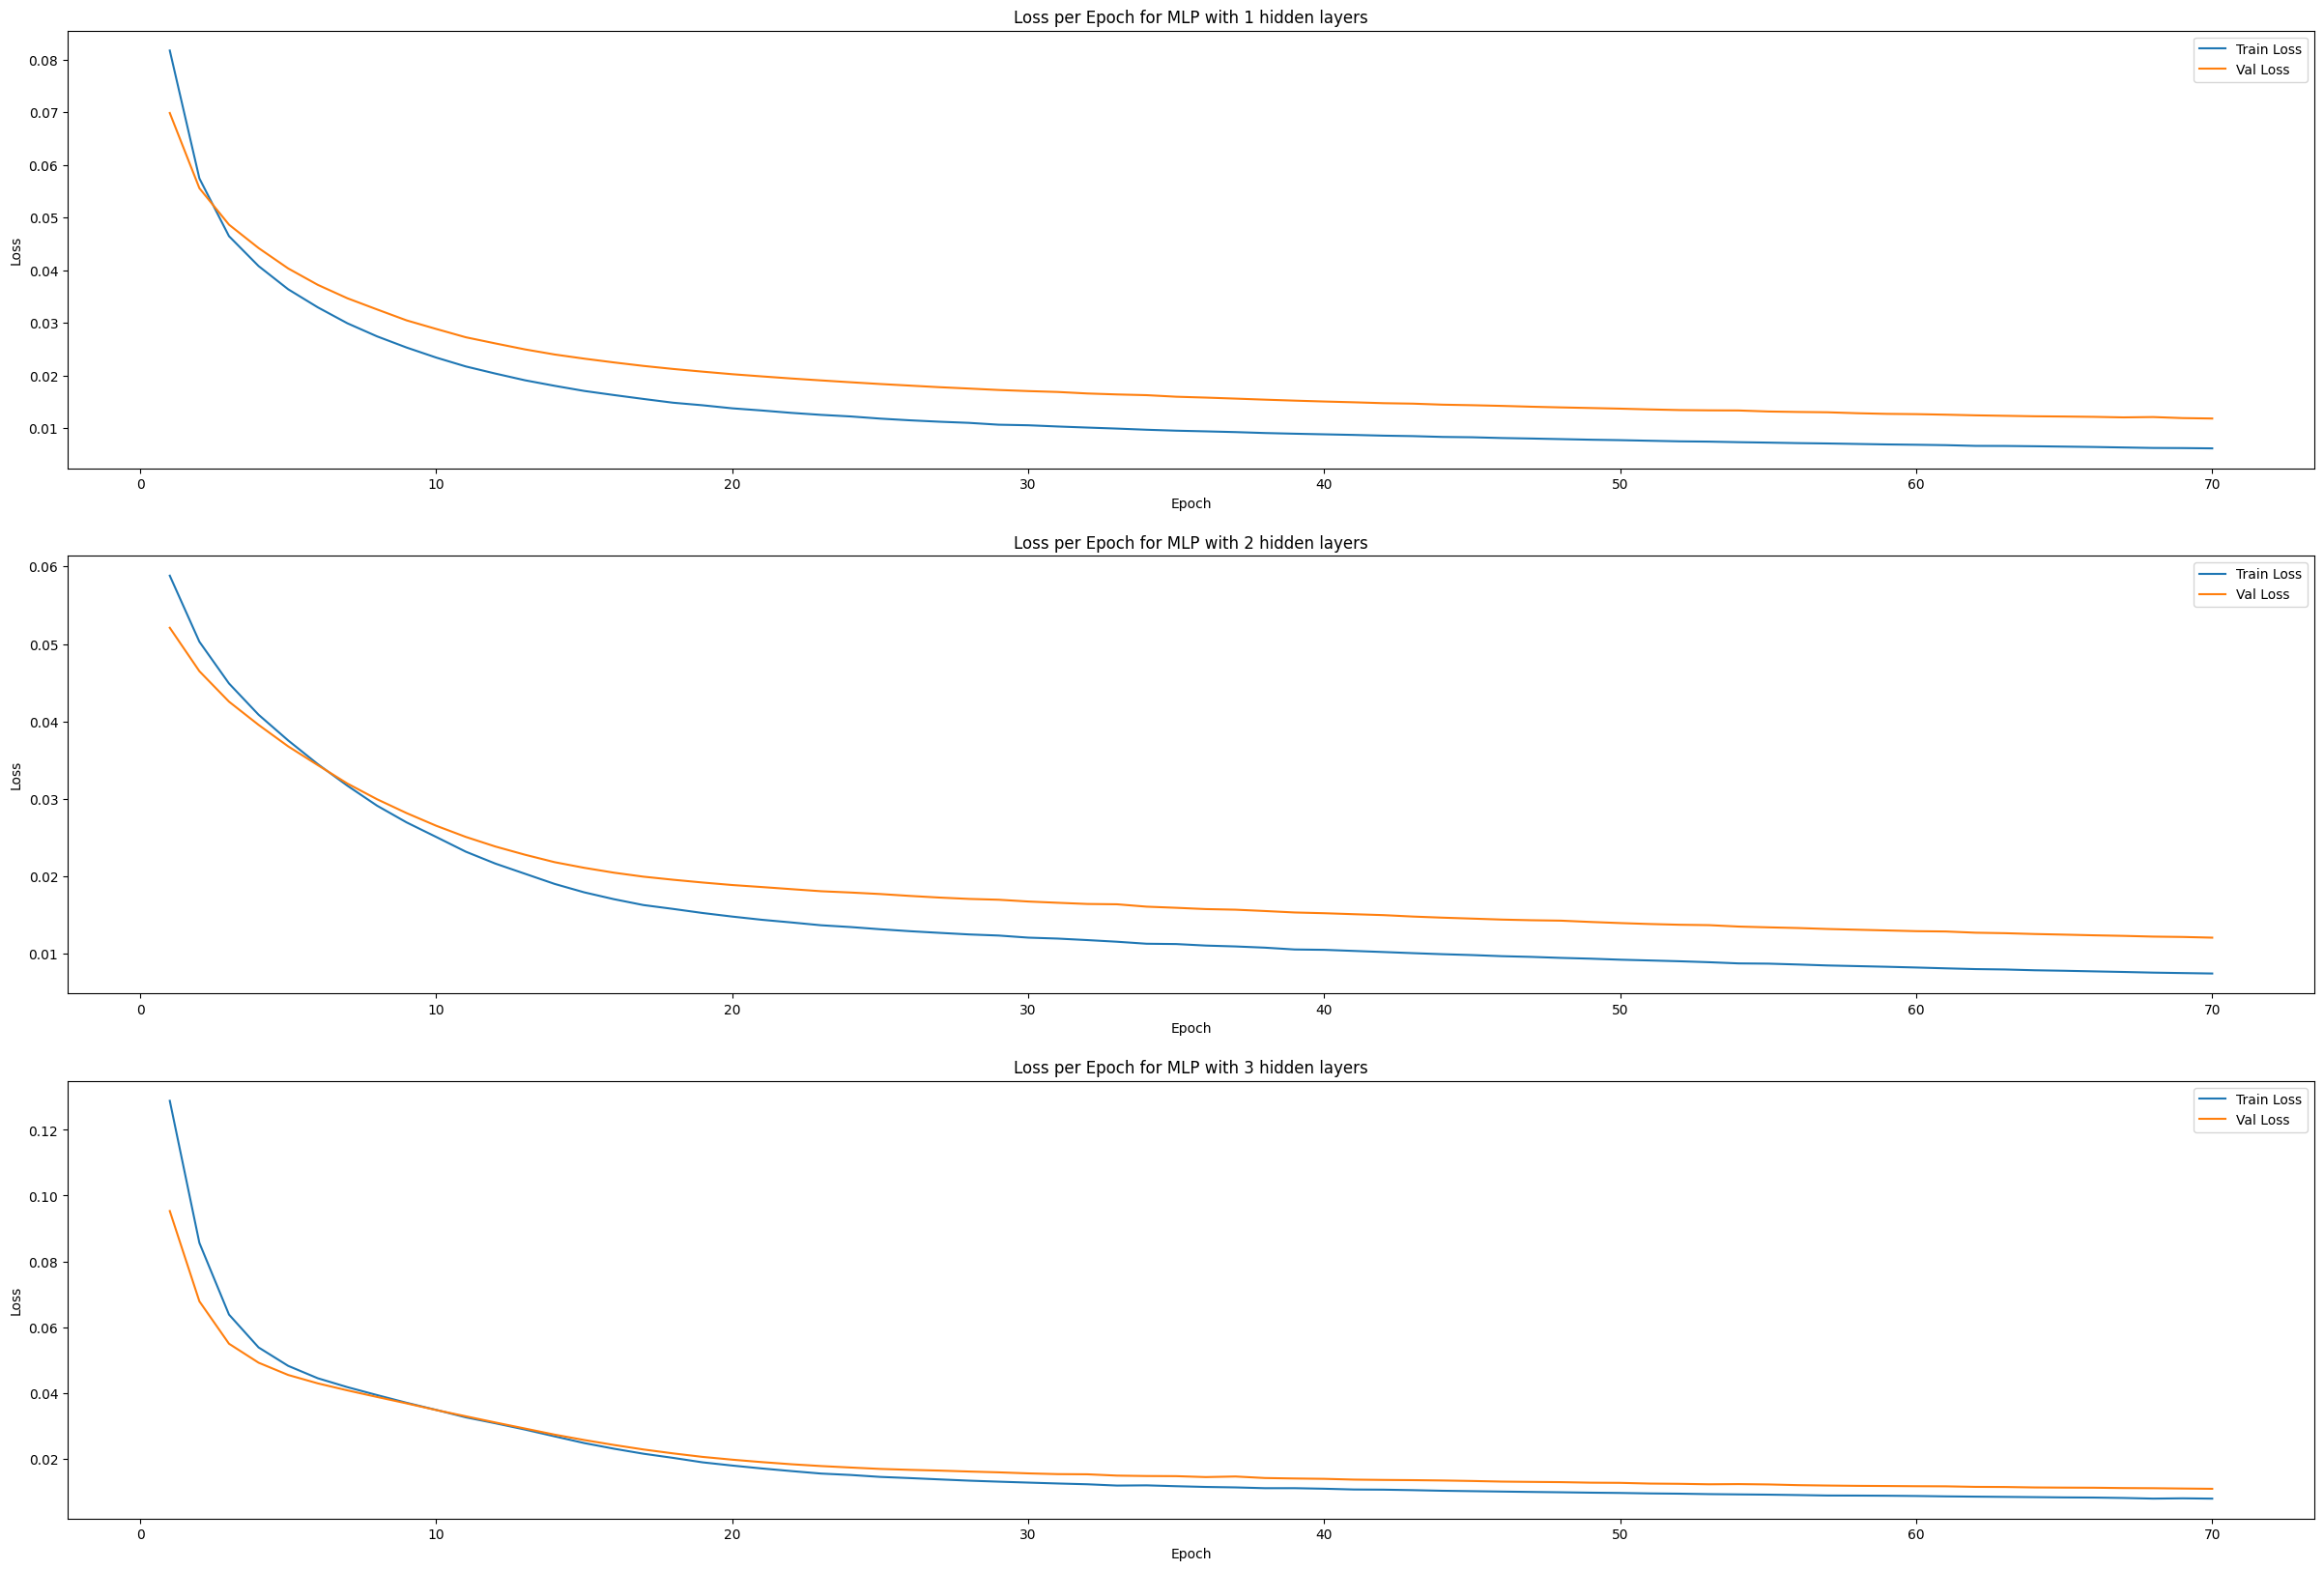

In [180]:
hparams = {'batch_size': 1, 'lr': 0.1, 'epochs': 70, 'optimizer':"Adadelta", 'loss_func':"MSE", 'model':"3_hidden", 'num_hidden':50}

possible_combination = [[0.01, "Adadelta", "MSE"], [0.01, "Adadelta", "L1"], [0.01, "SGD", "MSE"], [0.0001, "SGD", "L1"]]

#Chosen Optimizer and Loss function:
hparams['lr'] = possible_combination[0][0]
hparams['optimizer'] = possible_combination[0][1]
hparams['loss_func'] = possible_combination[0][2]
r2scores_model = [0, 0, 0]

models = []
fig, axs = plt.subplots(3, figsize=(30,20))

for i in range(3):
    hparams['model'] = (str(i+1)+"_hidden")
    print("******************************* Traing model with "+str(i+1)+" hidden layers *******************************")
    model, train_loss, val_loss, R2SCORE= train(hparams, train_loader, val_loader) ### train the model
    r2scores_model[i] = R2SCORE #store the R2 score for each model
    models.append(model)

    ## Plotting the training loss and validation loss vs epochs for each model
    axs[i].plot(list(range(1,len(train_loss)+1)), train_loss, label='Train Loss')
    axs[i].plot(list(range(1,len(val_loss)+1)), val_loss, label='Val Loss')
    axs[i].set_title('Loss per Epoch for MLP with '+str(i+1)+' hidden layers')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
   

based on the maximum R2 Score the best architecture is decided.

In [181]:
print("R2 Scores for validation results of each model : " + str(r2scores_model))
max_r2_idx = r2scores_model.index(max(r2scores_model))
print("The best network architecture with highest R2 score is MLP with "+ str(max_r2_idx+1)+" hidden layers"+"\n")
r2scores_params = [0, 0, 0, 0]
r2scores_params[0] = max(r2scores_model)

column_list_title = ['', 'one hidden layer', 'two hidden layer', 'three hidden layer']
R2_scores_Table = PrettyTable()
R2_scores_Table.field_names = column_list_title
R2_scores_Table.add_row(["R2 Score", r2scores_model[0], r2scores_model[1], r2scores_model[2]])
print(R2_scores_Table)

#best model of this part is stored in the models list
best_arch = models[max_r2_idx]

R2 Scores for validation results of each model : [0.6320129111887306, 0.6516359271026371, 0.618659408377982]
The best network architecture with highest R2 score is MLP with 2 hidden layers

+----------+--------------------+--------------------+--------------------+
|          |  one hidden layer  |  two hidden layer  | three hidden layer |
+----------+--------------------+--------------------+--------------------+
| R2 Score | 0.6320129111887306 | 0.6516359271026371 | 0.618659408377982  |
+----------+--------------------+--------------------+--------------------+


All the other combinations of the (optimizer, loss function) are exercised using the best architecture.

******************************* Training model with 2 hidden layers *******************************
===> Optimizer: Adadelta
===> Loss Function: L1
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [1, 1, 50]           3,800
            Linear-2                 [1, 1, 50]           2,550
            Linear-3                 [1, 1, 50]           2,550
            Linear-4                  [1, 1, 1]              51
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
Epoch 1 of 70
Train Loss: 0.3485,         Val Loss: 0.2172,
Epoch 2 of 70
Train Loss: 0.1684,         Val Loss: 0.1295,
Epoch 3 of 70
Train Loss: 0.1315, 

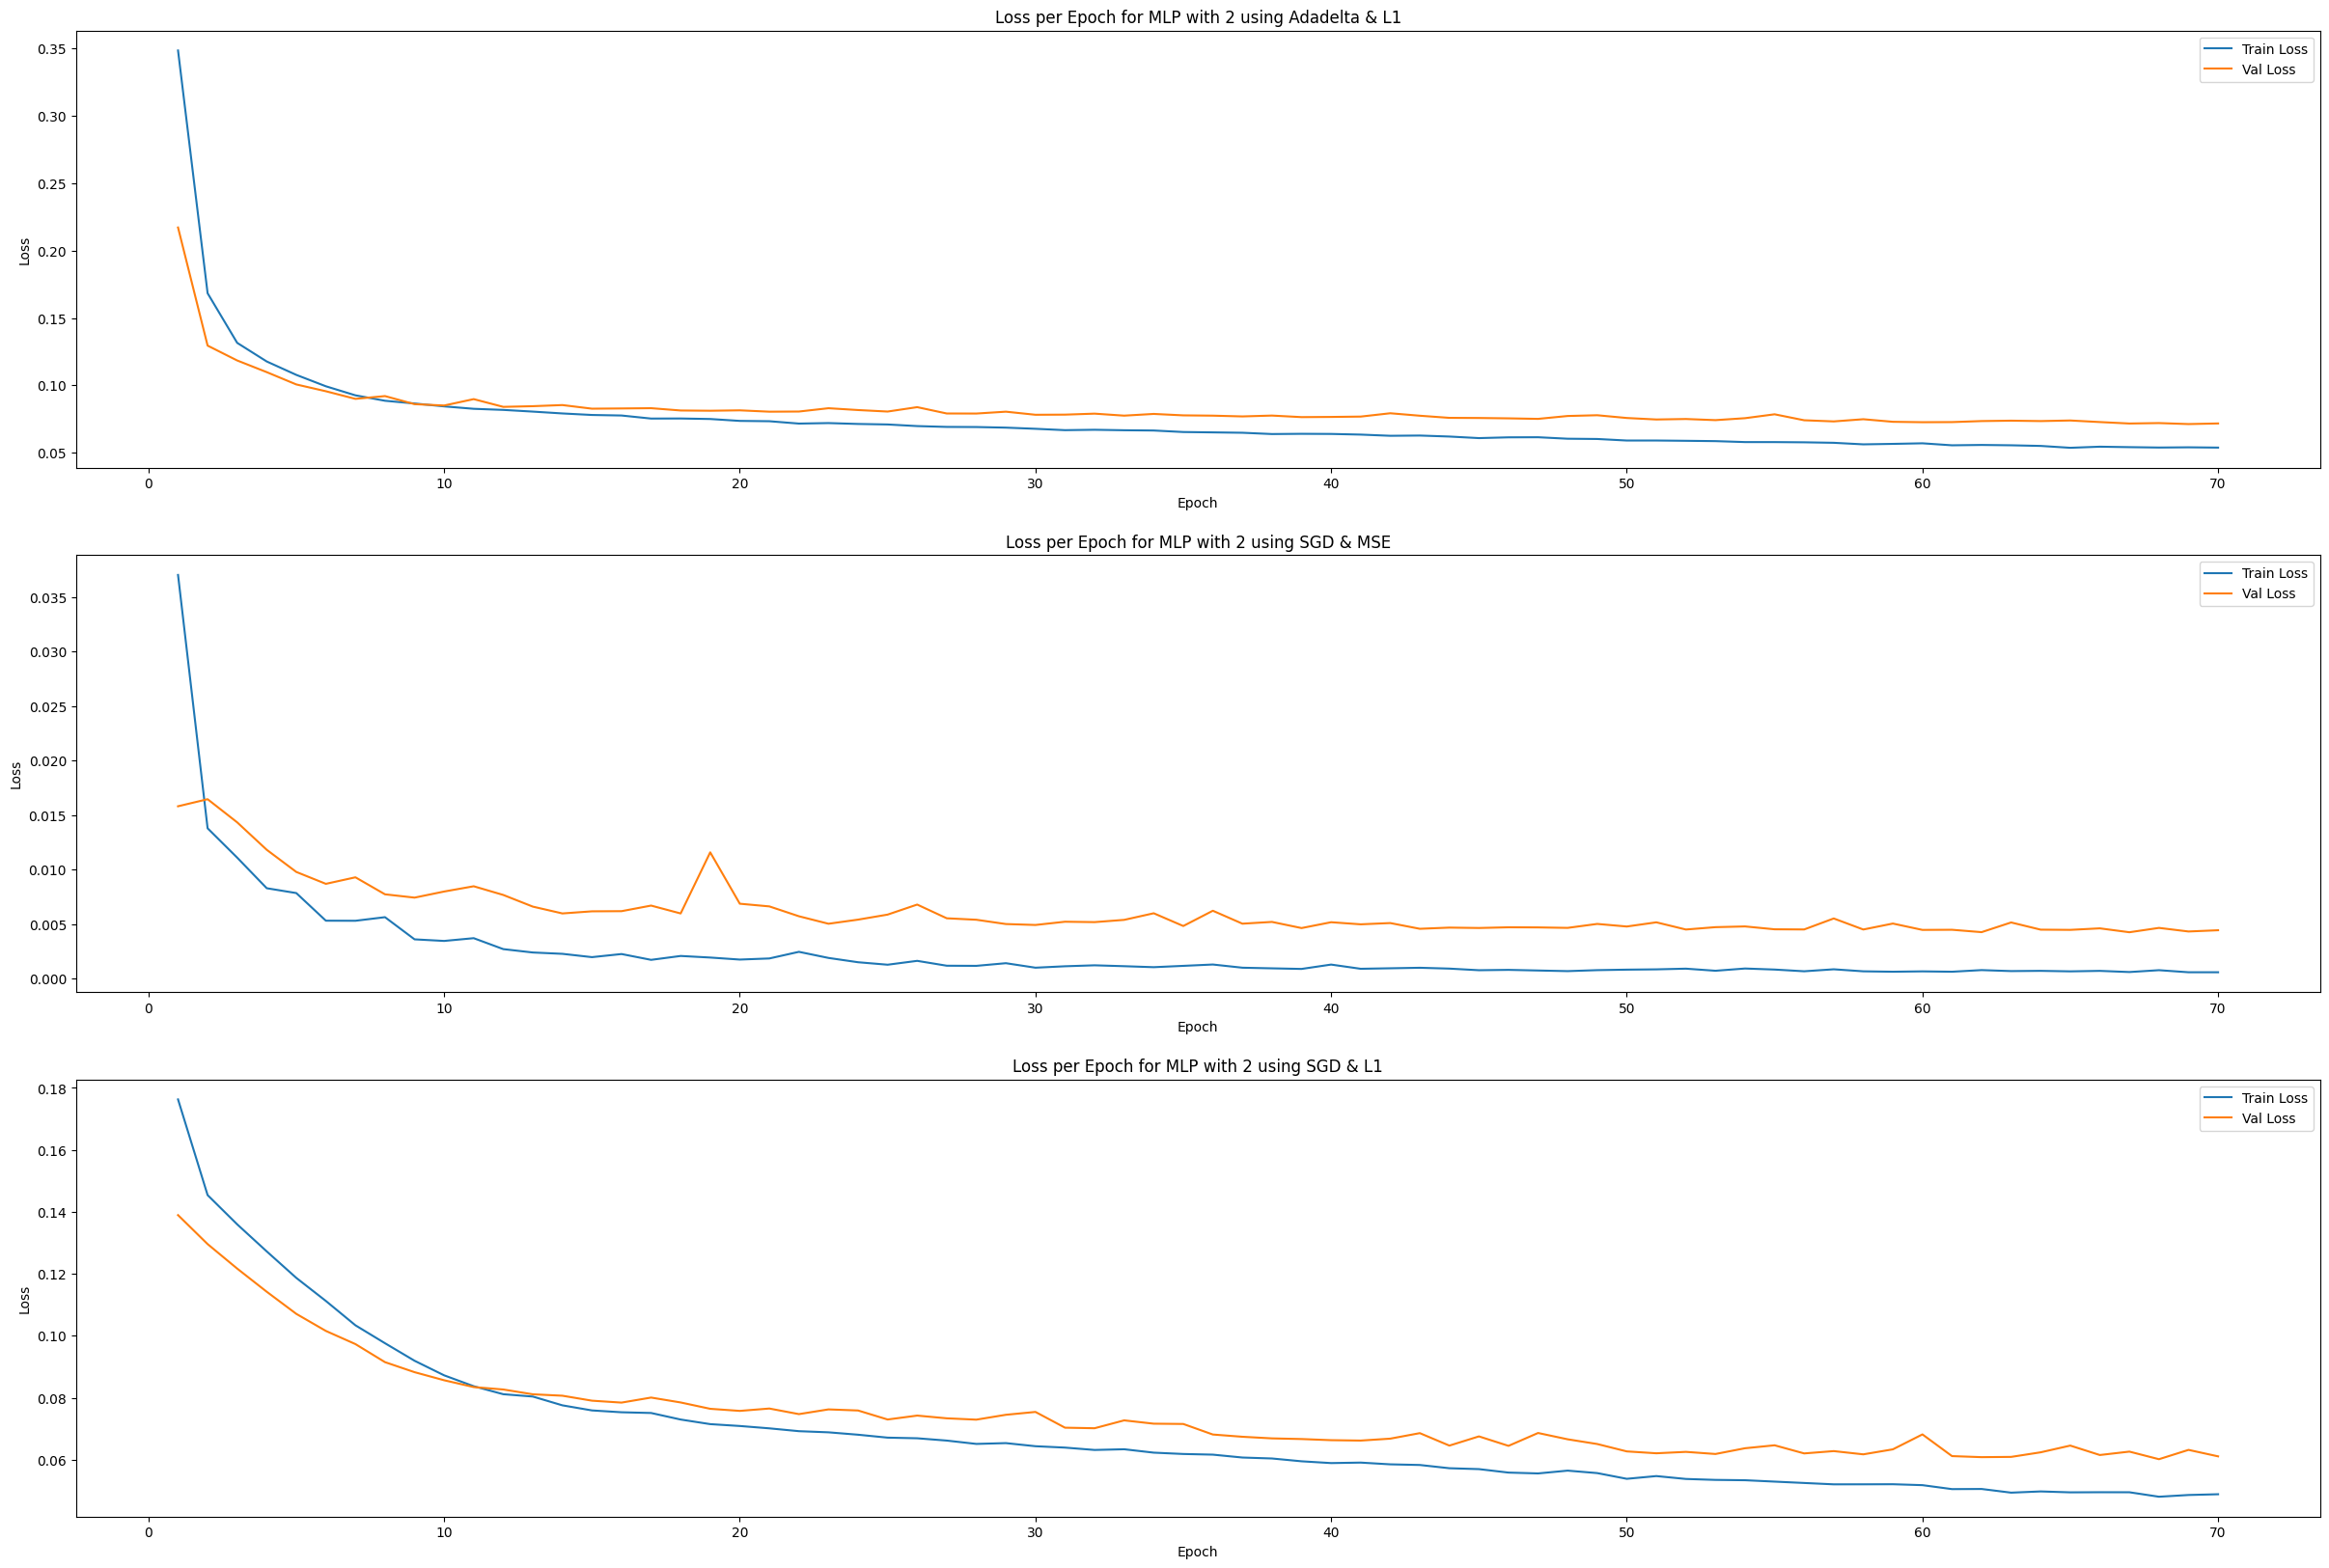

In [182]:
fig, axs = plt.subplots(3, figsize=(30,20))
models_1 = []
models_1.append(best_arch)
for i in range(3):
    hparams['lr'] = possible_combination[i+1][0]
    hparams['optimizer'] = possible_combination[i+1][1]
    hparams['loss_func'] = possible_combination[i+1][2]
    hparams['model'] = (str(max_r2_idx+1)+"_hidden")
    print("******************************* Training model with "+str(max_r2_idx+1)+" hidden layers *******************************")
    print("===> Optimizer: "+hparams['optimizer'])
    print("===> Loss Function: "+hparams['loss_func'])

    model, train_loss, val_loss, R2SCORE= train(hparams, train_loader, val_loader) ### train the model

    models_1.append(model)
    r2scores_params[i+1] = R2SCORE


    axs[i].plot(list(range(1,len(train_loss)+1)), train_loss, label='Train Loss')
    axs[i].plot(list(range(1,len(val_loss)+1)), val_loss, label='Val Loss')
    axs[i].set_title('Loss per Epoch for MLP with '+str(max_r2_idx+1)+' using '+hparams['optimizer']+ ' & '+hparams['loss_func'])
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].legend()

Using the R2 Score calculated on the validation results best optimizer and loss function can be decided.

Ultimately the best model is saved to be used ion the test data.

In [183]:
print("R2 Scores for validation results of each parameter pair : " + str(r2scores_params))
max_r2_idx = r2scores_params.index(max(r2scores_params))
best_comb = possible_combination[max_r2_idx]
# best_model = models
print("The best network parameter pair with highest R2 score is with optimizer : "+ str(best_comb[1])+" and loss function : " + str(best_comb[2])+"\n")

column_list_title = ['']
for i in possible_combination:
    column_list_title.append(str(i[1])+" & "+ str(i[2]))
R2_scores_Table = PrettyTable()
R2_scores_Table.field_names = column_list_title
R2_scores_Table.add_row(["R2 Score", r2scores_params[0], r2scores_params[1], r2scores_params[2], r2scores_params[3]])
print(R2_scores_Table)

## Saving the Best Model
best_model = models_1[max_r2_idx+1]
torch.save(best_model.state_dict(), 'Best_model')


R2 Scores for validation results of each parameter pair : [0.6516359271026371, 0.6333606900774619, 0.8962266899857099, 0.6609694342586235]
The best network parameter pair with highest R2 score is with optimizer : SGD and loss function : MSE

+----------+--------------------+--------------------+--------------------+--------------------+
|          |   Adadelta & MSE   |   Adadelta & L1    |     SGD & MSE      |      SGD & L1      |
+----------+--------------------+--------------------+--------------------+--------------------+
| R2 Score | 0.6516359271026371 | 0.6333606900774619 | 0.8962266899857099 | 0.6609694342586235 |
+----------+--------------------+--------------------+--------------------+--------------------+


    *The method for Testing the unseen data

in order to test the unseen data, the best model that was decided in the previuous sections is used.

Note that no gradient is required in test phase.


In [184]:
def Testing (model,test_loader, loss_func):
    model.eval()  # No training in post-processing
    y_true = []
    y_pred = []
    test_running_loss = 0.0
    counter = 0
    total = 0
    R2SCORE = 0
    ## Using the Best Model
    model.load_state_dict(torch.load('Best_model'))

    with torch.no_grad():
        for i, data in enumerate(test_loader):
            counter += 1
            data, target = data
            data, target = data.float(), target.float()
            data = data.reshape(-1, 1*num_cols)    ## Reshape the image data for the fully-connected NN
            total += target.size(0)
            outputs = model(data)
            #LOSS FUNCIOTN
            if (loss_func == "MSE"):
                criterion = nn.MSELoss()
            elif (loss_func == "L1"):
                criterion = nn.L1Loss()
            else : #Default loss function = MSE
                criterion = nn.MSELoss()

            loss = criterion(outputs, target)

            y_true.append(target.detach().numpy())
            y_pred.append(outputs.detach().numpy())

            test_running_loss += loss.item()

        print("Predicted output= "+str(y_true))
        print("Actual output= " + str(y_pred))
        R2SCORE = r2_score(y_true, y_pred)
        
        test_loss = test_running_loss / counter
    return test_loss, y_true, y_pred, R2SCORE

 5 Random samples are selected from the test set.

In [219]:
from torch.utils.data import random_split, Dataset, DataLoader

test_dataset = MyDataset(test_set)
Test, redundant = random_split(test_dataset, [5, test_set.shape[0] -5])
test_loader = torch.utils.data.DataLoader(Test, batch_size=1, shuffle=True)


In [220]:

print("******************************* Testin on 5 random data *******************************")
test_loss, y_true, y_pred, r2_score_tst = Testing(best_model, test_loader, best_comb[2])
print( "Test Loss: " + str(test_loss))
print( "R2 Score:"+str(r2_score_tst))

******************************* Testin on 5 random data *******************************
Predicted output= [array([0.36226466], dtype=float32), array([0.0477021], dtype=float32), array([0.43673864], dtype=float32), array([0.25730896], dtype=float32), array([0.04144518], dtype=float32)]
Actual output= [array([0.31651464], dtype=float32), array([0.04339907], dtype=float32), array([0.45971712], dtype=float32), array([0.20038836], dtype=float32), array([0.0627518], dtype=float32)]
Test Loss: 0.001266703682631487
R2 Score:0.9511912338339464


Just to visualise the output, the actual results and the predicted ones are plotted together.

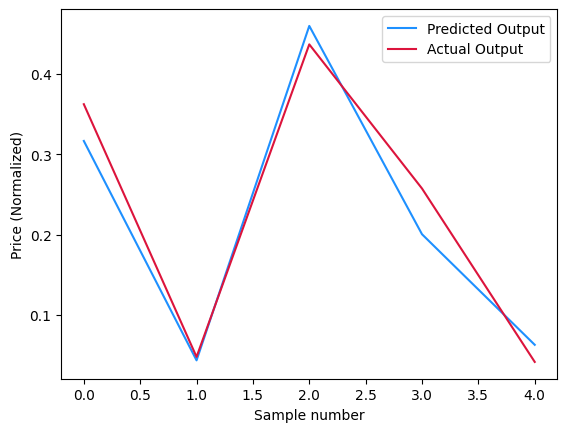

In [221]:
from matplotlib import pyplot as plt
plt.plot(y_pred, label='Predicted Output', color = 'dodgerblue')
plt.plot(y_true, label='Actual Output', color = 'crimson')
plt.xlabel("Sample number")
plt.ylabel("Price (Normalized)")
plt.legend()
plt.show()

Testing all of the samples in the test set

In [216]:
test_dataset = MyDataset(test_set)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

In [217]:
print("******************************* Testin on all the test set *******************************")
test_loss, y_true, y_pred, r2_score_tst = Testing(best_model, test_loader, best_comb[2])
print( "Test Loss: " + str(test_loss))
print( "R2 Score:"+str(r2_score_tst))

******************************* Testin on all the test set *******************************
Predicted output= [array([0.27256367], dtype=float32), array([0.43673864], dtype=float32), array([0.05825028], dtype=float32), array([0.12054264], dtype=float32), array([0.0477021], dtype=float32), array([0.36226466], dtype=float32), array([0.21508859], dtype=float32), array([0.3129845], dtype=float32), array([0.05545404], dtype=float32), array([0.04144518], dtype=float32), array([0.34534883], dtype=float32), array([0.22757475], dtype=float32), array([0.0286268], dtype=float32), array([0.07142857], dtype=float32), array([0.05813954], dtype=float32), array([0.44047618], dtype=float32), array([0.23394242], dtype=float32), array([0.07696567], dtype=float32), array([0.7982558], dtype=float32), array([0.08424696], dtype=float32), array([0.25730896], dtype=float32), array([0.07646733], dtype=float32), array([0.36403653], dtype=float32), array([0.16749723], dtype=float32), array([-0.00121816], dtype=flo

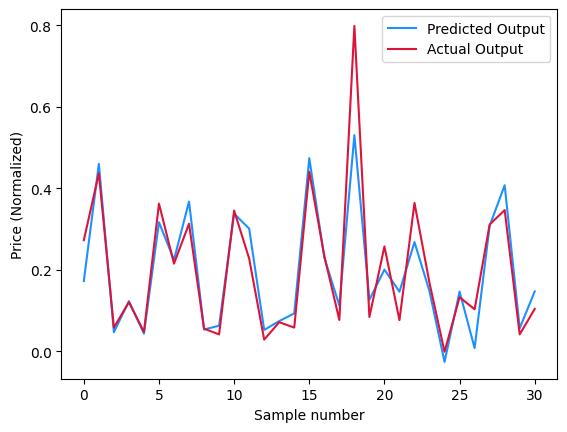

In [218]:
from matplotlib import pyplot as plt
plt.plot(y_pred, label='Predicted Output', color = 'dodgerblue')
plt.plot(y_true, label='Actual Output', color = 'crimson')
plt.xlabel("Sample number")
plt.ylabel("Price (Normalized)")
plt.legend()
plt.show()